In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import datetime
import pandas_datareader.data as web

In [54]:
start = datetime.datetime(2020,1,1)
end = datetime.datetime(2021,3,1)

In [55]:
df = web.DataReader("INKP.JK" ,'yahoo' ,start=start ,end=end)

In [56]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,7750.0,7600.0,7725.0,7625.0,1495800.0,7583.559570
2020-01-03,8125.0,7600.0,7600.0,8100.0,6037700.0,8055.978027
2020-01-06,8100.0,7900.0,8025.0,8000.0,4748600.0,7956.521484
2020-01-07,8125.0,7850.0,8000.0,8000.0,2557900.0,7956.521484
2020-01-08,8075.0,7825.0,7900.0,7975.0,3097400.0,7931.657227


In [57]:
len(df)

282

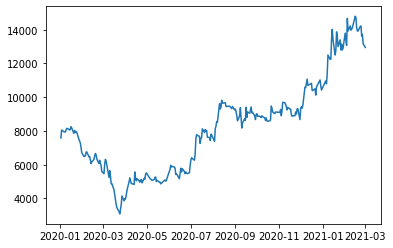

In [58]:
plt.plot(df['Adj Close'])

In [59]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=30).mean()
mavg2 = close_px.rolling(window=100,center=True).mean()

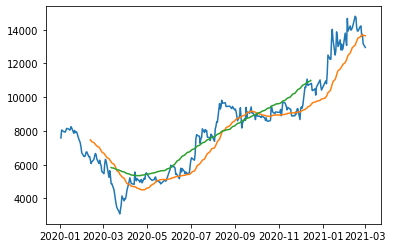

In [60]:
plt.plot(close_px)
plt.plot(mavg)
plt.plot(mavg2)

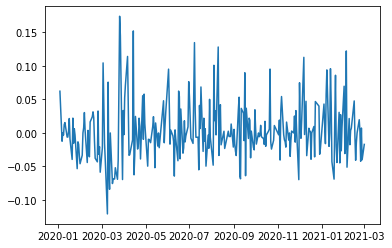

In [61]:
rets = close_px / close_px.shift(1) - 1
plt.plot(rets)

In [85]:
#komparasi hubungan antar saham
dfcomp = web.DataReader (['AALI.JK','BBCA.JK','AUTO.JK','BBRI.JK',
                          'KLBF.JK'],'yahoo',start=start ,end=end)['Adj Close']

In [86]:
dfcomp = dfcomp.dropna() #menghapus null 
dfcomp.head()


Symbols,AALI.JK,BBCA.JK,AUTO.JK,BBRI.JK,KLBF.JK
Date,,,,,
2020-01-02,13888.172852,32782.265625,1240.652222,4244.425781,1585.652222
2020-01-03,13962.441406,33321.285156,1216.793457,4254.050293,1605.288818
2020-01-06,13368.294922,33002.773438,1202.478271,4205.927734,1610.197998
2020-01-07,13269.270508,33027.273438,1197.706543,4234.801270,1605.288818
2020-01-08,13195.001953,32733.261719,1183.391357,4215.552246,1556.197510


In [87]:
retscomp = dfcomp.pct_change()
corr = retscomp.corr()
corr

Symbols,AALI.JK,BBCA.JK,AUTO.JK,BBRI.JK,KLBF.JK
Symbols,,,,,
AALI.JK,1.000000,0.494965,0.542460,0.494440,0.330469
BBCA.JK,0.494965,1.000000,0.512276,0.662220,0.404185
AUTO.JK,0.542460,0.512276,1.000000,0.562777,0.364071
BBRI.JK,0.494440,0.662220,0.562777,1.000000,0.364830
KLBF.JK,0.330469,0.404185,0.364071,0.364830,1.000000


([<matplotlib.axis.YTick at 0xb92c4c8>,
 <a list of 5 Text yticklabel objects>)

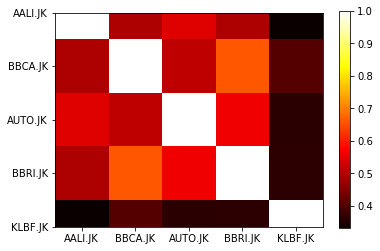

In [88]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)),corr.columns)
plt.yticks(range(len(corr)),corr.columns)